In [2]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
all_files = glob.glob(os.path.join('./experiments_logs', "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [4]:
with_state_pred = df.query('include_state_pred == True').reset_index()
with_state_pred

,index,gamma,include_state_pred,best_timestep,i_episode
0,266,0.0,True,191,500
1,267,0.0,True,3488,500
2,268,0.0,True,70,500
3,269,0.0,True,4547,500
4,270,0.0,True,401,500
...,...,...,...,...,...
223,489,0.0,True,524,500
224,490,0.0,True,613,500
225,491,0.0,True,1096,500
226,492,0.0,True,1275,500


In [5]:
without_state_pred = df.query('include_state_pred == False').reset_index()
without_state_pred

,index,gamma,include_state_pred,best_timestep,i_episode
0,0,0.0,False,710,500
1,1,0.0,False,105,500
2,2,0.0,False,10000,97
3,3,0.0,False,10000,23
4,4,0.0,False,84,500
...,...,...,...,...,...
261,261,0.0,False,10000,80
262,262,0.0,False,10000,18
263,263,0.0,False,10000,55
264,264,0.0,False,91,500


In [13]:
(with_state_pred.shape[0], 
with_state_pred.query('best_timestep == 10000').shape[0], 
with_state_pred.query('best_timestep == 10000').shape[0] / with_state_pred.shape[0])

(228, 112, 0.49122807017543857)

In [14]:
(without_state_pred.shape[0],
 without_state_pred.query('best_timestep == 10000').shape[0], 
 without_state_pred.query('best_timestep == 10000').shape[0] / without_state_pred.shape[0])

(266, 110, 0.41353383458646614)

157.875

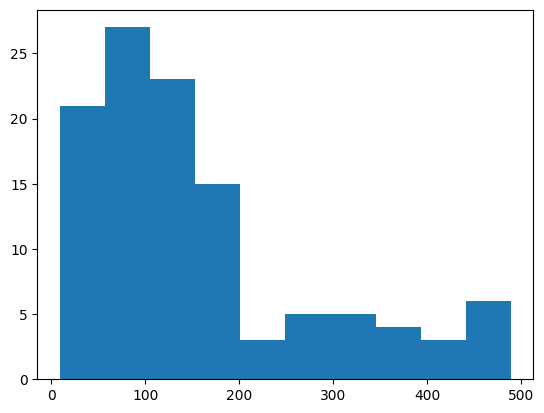

In [7]:
plt.hist(with_state_pred.query('best_timestep == 10000')['i_episode'])
with_state_pred.query('best_timestep == 10000')['i_episode'].mean()

139.4

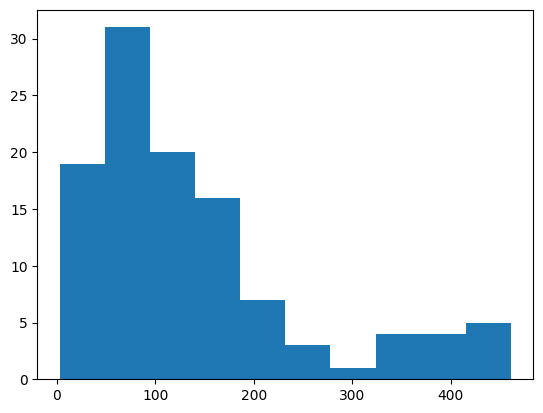

In [42]:
plt.hist(without_state_pred.query('best_timestep == 10000')['i_episode'])
without_state_pred.query('best_timestep == 10000')['i_episode'].mean()

(array([52., 14.,  4.,  4.,  4.,  1.,  1.,  1.,  0.,  2.]),
 array([ 105. , 1024.8, 1944.6, 2864.4, 3784.2, 4704. , 5623.8, 6543.6,
        7463.4, 8383.2, 9303. ]),
 <BarContainer object of 10 artists>)

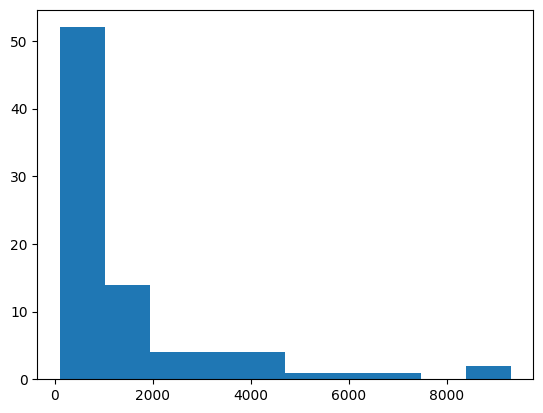

In [28]:
plt.hist(with_state_pred.query('100 < best_timestep < 10000')['best_timestep'])

(array([68., 15.,  6.,  1.,  3.,  0.,  0.,  2.,  1.,  2.]),
 array([ 102. , 1082.9, 2063.8, 3044.7, 4025.6, 5006.5, 5987.4, 6968.3,
        7949.2, 8930.1, 9911. ]),
 <BarContainer object of 10 artists>)

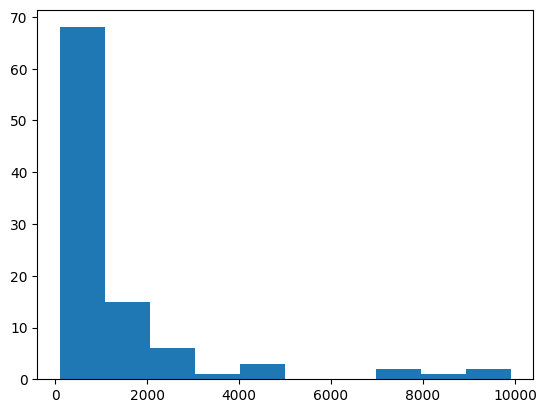

In [27]:
plt.hist(without_state_pred.query('100 < best_timestep < 10000')['best_timestep'])

In [33]:
with_state_pred.query('best_timestep != 10000')['best_timestep'].mean()

1028.5862068965516

In [34]:
without_state_pred.query('best_timestep != 10000')['best_timestep'].mean()

815.7115384615385

In [15]:
with_state_pred['best_timestep'].mean()

5435.596491228071

In [16]:
without_state_pred['best_timestep'].mean()

4613.725563909775